<a href="https://colab.research.google.com/github/FitriAnggun/BengkelKoding/blob/main/Fitria_Anggun_Citra_Dewi_A11_2020_13160.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
dir = 'hungarian.data'
with open(dir, encoding='Latin1') as file:
  lines = [line.strip() for line in file]

lines[0:10]

['1254 0 40 1 1 0 0',
 '-9 2 140 0 289 -9 -9 -9',
 '0 -9 -9 0 12 16 84 0',
 '0 0 0 0 150 18 -9 7',
 '172 86 200 110 140 86 0 0',
 '0 -9 26 20 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 -9 -9 12',
 '20 84 0 -9 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 1 1 1',
 '1 1 -9. -9. name']

In [ ]:
import itertools
data = itertools.takewhile(
    lambda x: len(x) == 76,
    (' '.join(lines[i:(i +10)]).split() for i in range(0, len(lines), 10))
)

dir = pd.DataFrame.from_records(data)

dir.head()

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,1254,0,40,1,1,0,0,-9,2,140,...,-9,-9,1,1,1,1,1,-9.,-9.,name
1,1255,0,49,0,1,0,0,-9,3,160,...,-9,-9,1,1,1,1,1,-9.,-9.,name
2,1256,0,37,1,1,0,0,-9,2,130,...,-9,-9,1,1,1,1,1,-9.,-9.,name
3,1257,0,48,0,1,1,1,-9,4,138,...,2,-9,1,1,1,1,1,-9.,-9.,name
4,1258,0,54,1,1,0,1,-9,3,150,...,1,-9,1,1,1,1,1,-9.,-9.,name


In [ ]:
dir.replace('-9', np.nan, inplace=True)
dir.head()

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,1254,0,40,1,1,0,0,NaN,2,140,...,NaN,NaN,1,1,1,1,1,-9.,-9.,name
1,1255,0,49,0,1,0,0,NaN,3,160,...,NaN,NaN,1,1,1,1,1,-9.,-9.,name
2,1256,0,37,1,1,0,0,NaN,2,130,...,NaN,NaN,1,1,1,1,1,-9.,-9.,name
3,1257,0,48,0,1,1,1,NaN,4,138,...,2,NaN,1,1,1,1,1,-9.,-9.,name
4,1258,0,54,1,1,0,1,NaN,3,150,...,1,NaN,1,1,1,1,1,-9.,-9.,name


In [ ]:
df_selected = dir.iloc[:, [2,3,8,9,11,15,18,31,37,39,40,43,50,57]]

df_selected.head()

,2,3,8,9,11,15,18,31,37,39,40,43,50,57
0,40,1,2,140,289,0,0,172,0,0,NaN,NaN,NaN,0
1,49,0,3,160,180,0,0,156,0,1,2,NaN,NaN,1
2,37,1,2,130,283,0,1,98,0,0,NaN,NaN,NaN,0
3,48,0,4,138,214,0,0,108,1,1.5,2,NaN,NaN,3
4,54,1,3,150,NaN,0,0,122,0,0,NaN,NaN,NaN,0


In [ ]:
column_mapping = {
    2: 'age',
    3: 'sex',
    8: 'cp',
    9: 'trestbps',
    11: 'chol',
    15: 'fbs',
    18: 'restecg',
    31: 'thalach',
    37: 'exang',
    39: 'oldpeak',
    40: 'slope',
    43: 'ca',
    50: 'thal',
    57: 'target'
}

df_selected.rename(columns=column_mapping, inplace=True)
df_selected.head()

<ipython-input-241-867b1594b887>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.rename(columns=column_mapping, inplace=True)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,40,1,2,140,289,0,0,172,0,0,NaN,NaN,NaN,0
1,49,0,3,160,180,0,0,156,0,1,2,NaN,NaN,1
2,37,1,2,130,283,0,1,98,0,0,NaN,NaN,NaN,0
3,48,0,4,138,214,0,0,108,1,1.5,2,NaN,NaN,3
4,54,1,3,150,NaN,0,0,122,0,0,NaN,NaN,NaN,0


In [ ]:
df_selected.isnull().sum()

age           0
sex           0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
oldpeak       0
slope       190
ca          290
thal        266
target        0
dtype: int64

In [ ]:
df_selected.loc[:, df_selected.isnull().any()].columns

Index(['trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'slope', 'ca',
       'thal'],
      dtype='object')

In [ ]:
df_cleaned = df_selected.dropna(thresh=len(df_selected.columns) - 100)
df_cleaned = df_selected.dropna(axis=1, thresh=len(df_selected) - 100)
df_cleaned.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,40,1,2,140,289,0,0,172,0,0,0
1,49,0,3,160,180,0,0,156,0,1,1
2,37,1,2,130,283,0,1,98,0,0,0
3,48,0,4,138,214,0,0,108,1,1.5,3
4,54,1,3,150,NaN,0,0,122,0,0,0


In [ ]:
print("All Duplicate Rows:")
df_cleaned[df_cleaned.duplicated(keep=False)]

All Duplicate Rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
90,49,0,2,110,NaN,0,0,160,0,0,0
163,49,0,2,110,NaN,0,0,160,0,0,0


In [ ]:
dataClean = df_cleaned.drop_duplicates()
print("All Duplicate Rows:")
dataClean[dataClean.duplicated(keep=False)]

All Duplicate Rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target


In [ ]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       294 non-null    object
 1   sex       294 non-null    object
 2   cp        294 non-null    object
 3   trestbps  293 non-null    object
 4   chol      271 non-null    object
 5   fbs       286 non-null    object
 6   restecg   293 non-null    object
 7   thalach   293 non-null    object
 8   exang     293 non-null    object
 9   oldpeak   294 non-null    object
 10  slope     104 non-null    object
 11  ca        4 non-null      object
 12  thal      28 non-null     object
 13  target    294 non-null    object
dtypes: object(14)
memory usage: 32.3+ KB


In [ ]:
dataClean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 293 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       293 non-null    object
 1   sex       293 non-null    object
 2   cp        293 non-null    object
 3   trestbps  292 non-null    object
 4   chol      271 non-null    object
 5   fbs       285 non-null    object
 6   restecg   292 non-null    object
 7   thalach   292 non-null    object
 8   exang     292 non-null    object
 9   oldpeak   293 non-null    object
 10  target    293 non-null    object
dtypes: object(11)
memory usage: 27.5+ KB


In [ ]:
df = dataClean.astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 293 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       293 non-null    float64
 1   sex       293 non-null    float64
 2   cp        293 non-null    float64
 3   trestbps  292 non-null    float64
 4   chol      271 non-null    float64
 5   fbs       285 non-null    float64
 6   restecg   292 non-null    float64
 7   thalach   292 non-null    float64
 8   exang     292 non-null    float64
 9   oldpeak   293 non-null    float64
 10  target    293 non-null    float64
dtypes: float64(11)
memory usage: 27.5 KB


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = df.fillna(df.mean())

target
0.0    187
1.0     37
3.0     28
2.0     26
4.0     15
Name: count, dtype: int64


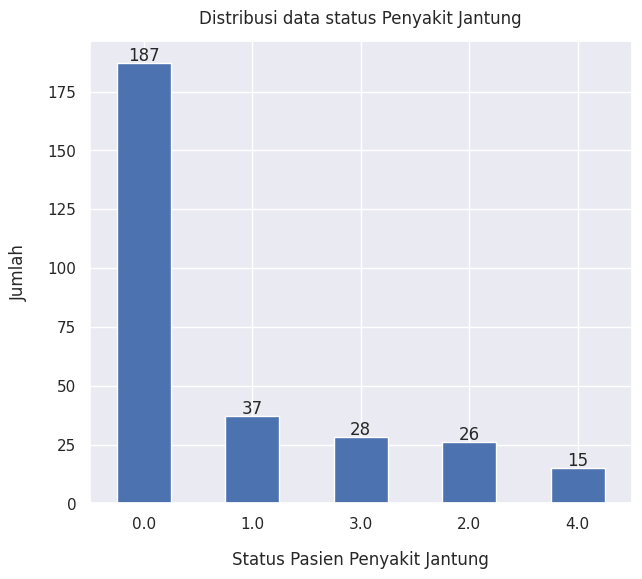

In [ ]:
plot_data = df['target'].value_counts()
print(plot_data)
sns.set_theme(font_scale=1.0)
plot_data.plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Status Pasien Penyakit Jantung", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi data status Penyakit Jantung", y=1.02);

for i, counts in enumerate(plot_data):
  plt.text(i, (counts + 1), str(counts), ha='center')

plt.show()

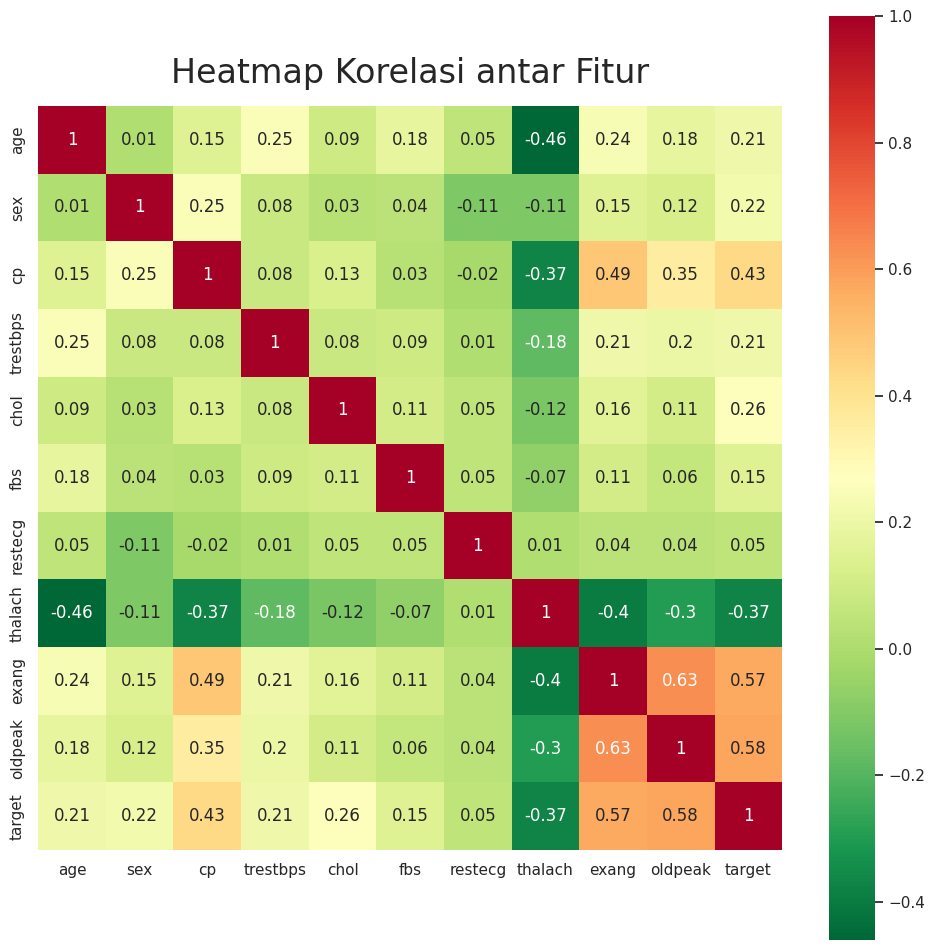

In [ ]:
correlation = df.corr()
plt.figure(figsize=(12, 12))
plt.title("Heatmap Korelasi antar Fitur", y=1.02, fontdict={'size': 24})
sns.heatmap(
  correlation.round(2),
  annot = True,
  vmax = 1,
  square = True,
  cmap = 'RdYlGn_r'
)

plt.show()

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000
mean,47.822526,0.726962,2.986348,132.660959,250.848708,0.070175,0.219178,139.058219,0.304795,0.588055,0.795222
std,7.824875,0.446282,0.965049,17.576782,65.059056,0.252362,0.460690,23.558003,0.460320,0.909554,1.238251
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,82.000000,0.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,122.000000,0.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,130.000000,248.000000,0.000000,0.000000,140.000000,0.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,140.000000,277.000000,0.000000,0.000000,155.000000,1.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.000000,1.000000,5.000000,4.000000


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('target', axis=1).values
y = df['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clean_classifier_nb = GaussianNB()
clean_classifier_nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
clean_classifier_dt = DecisionTreeClassifier(random_state=42)
clean_classifier_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
clean_classifier_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clean_classifier_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score, confusion_matrix, precision_score

In [ ]:
def evaluation(Y_test, Y_pred):
  acc = accuracy_score(Y_test, Y_pred)
  rcl = recall_score(Y_test, Y_pred, average='weighted')
  f1 = f1_score(Y_test, Y_pred, average='weighted')
  ps = precision_score(Y_test, Y_pred, average='weighted')

  metric_dict = {
    'accuracy': round(acc, 3),
    'recall': round(rcl, 3),
    'F1 score': round(f1, 3),
    'Precision score': round(ps, 3)
  }

  return print(metric_dict)

In [ ]:
y_pred_nb = clean_classifier_nb.predict(X_test)

# Evaluate the Gaussian NB model
print("\nGaussian NB Model:")
accuracy_nb = round(accuracy_score(y_test, y_pred_nb), 3)
print("Accuracy:",accuracy_nb)
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))


Gaussian NB Model:
Accuracy: 0.682
Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.93      0.91        57
         1.0       0.50      0.33      0.40        15
         2.0       0.00      0.00      0.00         7
         3.0       0.20      0.14      0.17         7
         4.0       0.14      0.50      0.22         2

    accuracy                           0.68        88
   macro avg       0.35      0.38      0.34        88
weighted avg       0.69      0.68      0.68        88



In [ ]:
evaluation(y_test, y_pred_nb)

{'accuracy': 0.682, 'recall': 0.682, 'F1 score': 0.678, 'Precision score': 0.686}


In [ ]:
y_pred_dt = clean_classifier_dt.predict(X_test)

# Evaluate the Decision Tree model
print("\nDecision Tree Model:")
accuracy_dt = round(accuracy_score(y_test, y_pred_dt), 3)
print("Accuracy:", accuracy_dt)
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))


Decision Tree Model:
Accuracy: 0.534
Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.79      0.78        57
         1.0       0.18      0.13      0.15        15
         2.0       0.00      0.00      0.00         7
         3.0       0.00      0.00      0.00         7
         4.0       0.00      0.00      0.00         2

    accuracy                           0.53        88
   macro avg       0.19      0.18      0.19        88
weighted avg       0.53      0.53      0.53        88



In [ ]:
evaluation(y_test, y_pred_dt)

{'accuracy': 0.534, 'recall': 0.534, 'F1 score': 0.533, 'Precision score': 0.534}


In [ ]:
y_pred_rf = clean_classifier_rf.predict(X_test)

# Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf = round(accuracy_score(y_test, y_pred_rf), 3)
print("Accuracy:", accuracy_rf)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Model:
Accuracy: 0.659
Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.96      0.85        57
         1.0       0.67      0.13      0.22        15
         2.0       0.00      0.00      0.00         7
         3.0       0.11      0.14      0.12         7
         4.0       0.00      0.00      0.00         2

    accuracy                           0.66        88
   macro avg       0.31      0.25      0.24        88
weighted avg       0.62      0.66      0.60        88



In [ ]:
evaluation(y_test, y_pred_rf)

{'accuracy': 0.659, 'recall': 0.659, 'F1 score': 0.6, 'Precision score': 0.617}


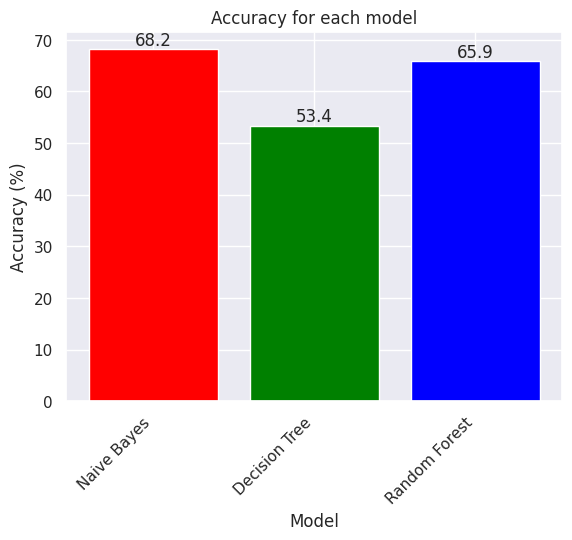

In [ ]:
model_comp = pd.DataFrame({
  'Model': ['Naive Bayes', 'Decision Tree', 'Random Forest'],
  'Accuracy': [accuracy_nb*100, accuracy_dt*100, accuracy_rf*100]
})

# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp['Model'], model_comp['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy for each model')
plt.xticks(rotation=45, ha='right')  # Untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

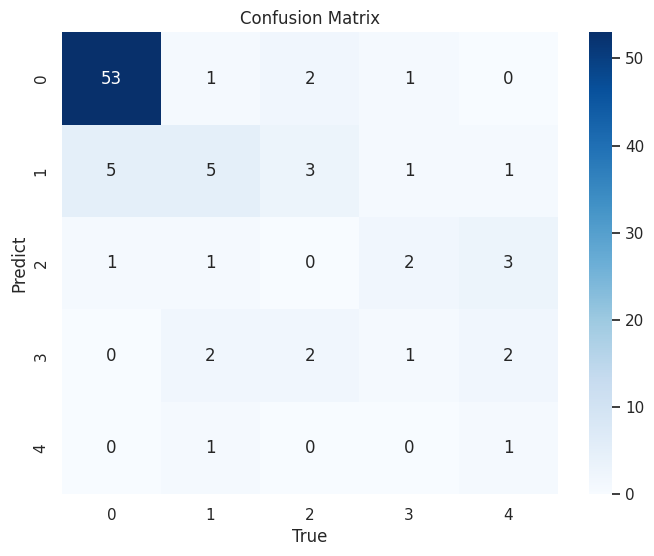

In [ ]:
cm = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE

X = df.drop(columns=['target'])
y = df['target']

smote = SMOTE(random_state=42)

# Resampling data menggunakan SMOTE
X_resampled, y_resampled = smote.fit_resample(X, y)

dataResampled = X_resampled
dataResampled['target'] = y_resampled

print("Jumlah baris data setelah resampling: {}".format(dataResampled.shape[0]))

Jumlah baris data setelah resampling: 935


target
0.0    187
1.0    187
3.0    187
4.0    187
2.0    187
Name: count, dtype: int64


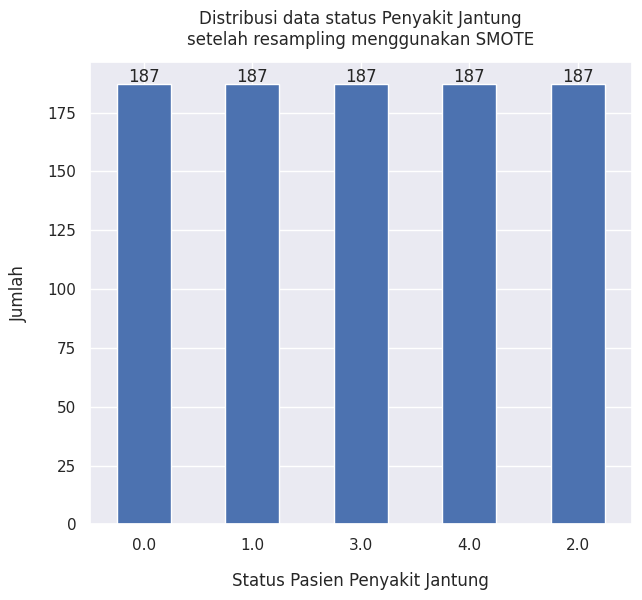

In [ ]:
plot_data = dataResampled['target'].value_counts()
print(plot_data)
sns.set_theme(font_scale=1.0)
plot_data.plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Status Pasien Penyakit Jantung", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi data status Penyakit Jantung\nsetelah resampling menggunakan SMOTE", y=1.02);

for i, counts in enumerate(plot_data):
  plt.text(i, (counts + 1), str(counts), ha='center')

plt.show()

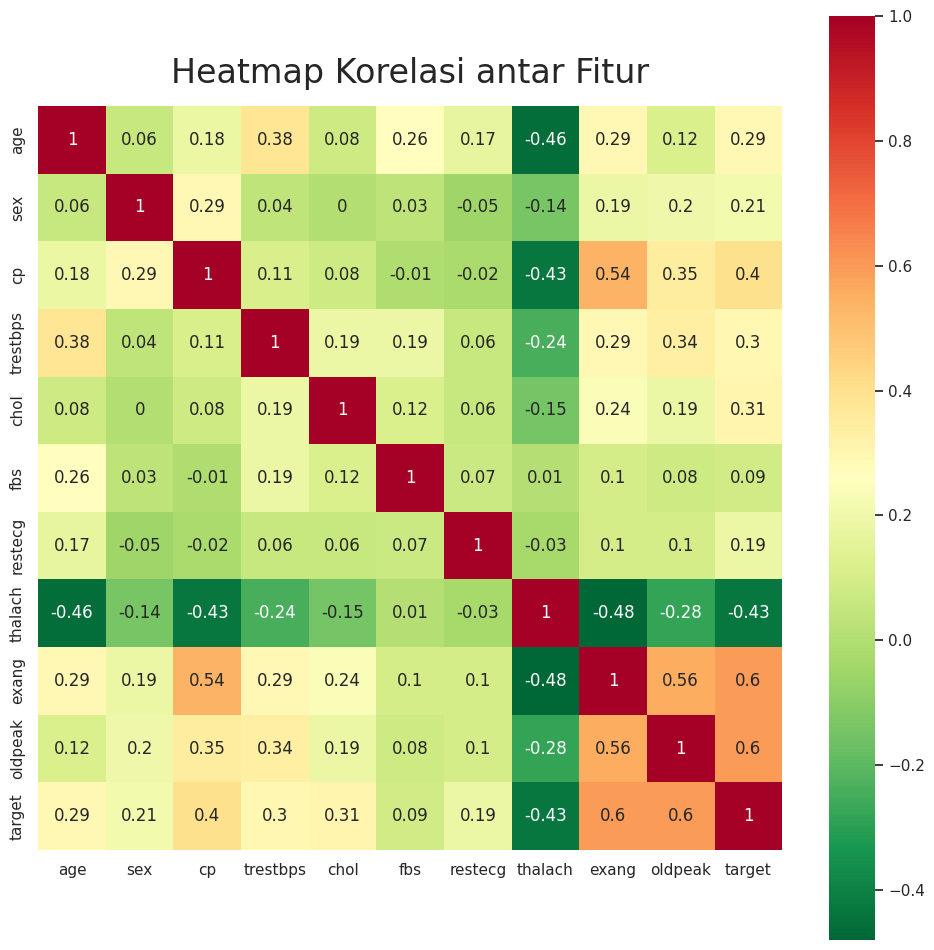

In [ ]:
correlation = dataResampled.corr()
plt.figure(figsize=(12, 12))
plt.title("Heatmap Korelasi antar Fitur", y=1.02, fontdict={'size': 24})
sns.heatmap(
  correlation.round(2),
  annot = True,
  vmax = 1,
  square = True,
  cmap = 'RdYlGn_r'
)

plt.show()

In [ ]:
columns_to_drop = [
  'thalach',
  'restecg',
  'fbs',
  'target'
]

X_selected = dataResampled.drop(columns_to_drop, axis=1).values
y = dataResampled['target']

In [ ]:
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(X_selected, y, test_size=0.3, random_state=42)

In [ ]:
optimized_classifier_nb = GaussianNB()
optimized_classifier_nb.fit(X_train_selected, y_train_selected)

GaussianNB()

In [ ]:
optimized_classifier_dt = DecisionTreeClassifier(random_state=42)
optimized_classifier_dt.fit(X_train_selected, y_train_selected)

DecisionTreeClassifier(random_state=42)

In [ ]:
optimized_classifier_rf = RandomForestClassifier(n_estimators=100, random_state=42)
optimized_classifier_rf.fit(X_train_selected, y_train_selected)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_nb_optimized = optimized_classifier_nb.predict(X_test_selected)

# Evaluate the Optimized Gaussian NB model
print("\nOptimized Gaussian NB Model:")
accuracy_nb_optimized = round(accuracy_score(y_test_selected, y_pred_nb_optimized), 3)
print("Accuracy:", accuracy_nb_optimized)
print("Classification Report:")
print(classification_report(y_test_selected, y_pred_nb_optimized))


Optimized Gaussian NB Model:
Accuracy: 0.544
Classification Report:
              precision    recall  f1-score   support

         0.0       0.61      0.75      0.67        48
         1.0       0.58      0.46      0.52        67
         2.0       0.45      0.55      0.50        55
         3.0       0.48      0.24      0.32        54
         4.0       0.57      0.75      0.65        57

    accuracy                           0.54       281
   macro avg       0.54      0.55      0.53       281
weighted avg       0.54      0.54      0.53       281



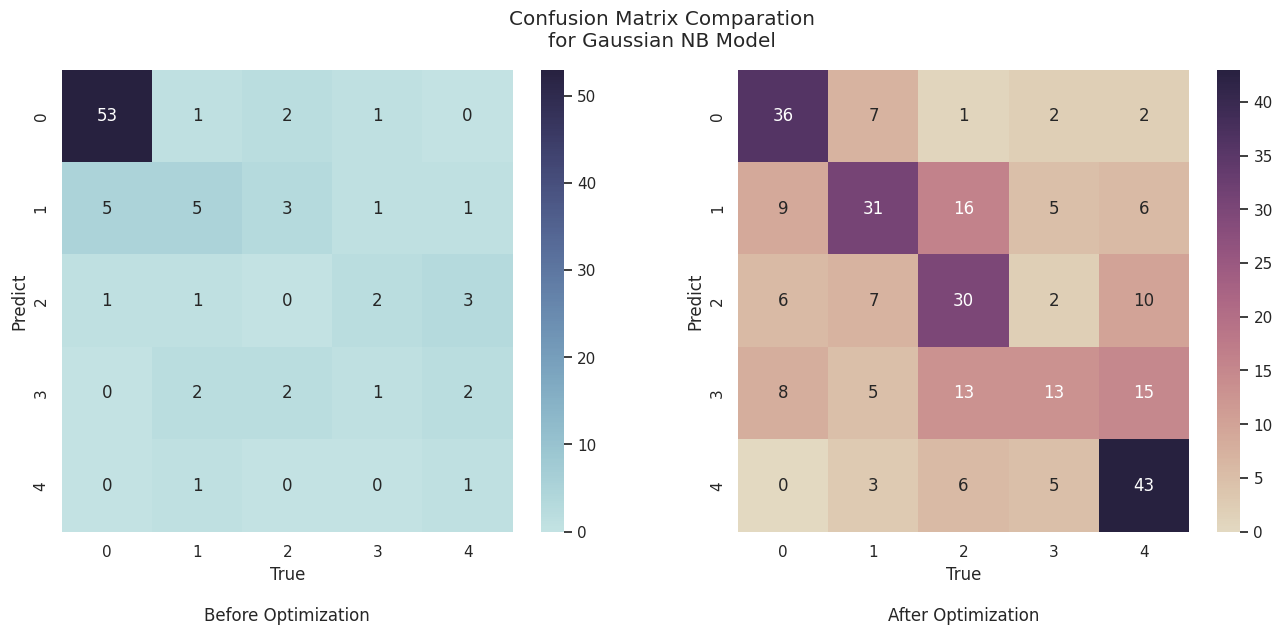

In [ ]:
cm = confusion_matrix(y_test, y_pred_nb)
cm_optimized = confusion_matrix(y_test_selected, y_pred_nb_optimized)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sns.heatmap(cm, annot=True, fmt="d", cmap=sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True), ax=ax[0])
sns.heatmap(cm_optimized, annot=True, fmt="d", cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True), ax=ax[1])

ax[0].set_ylabel('Predict')
ax[0].set_xlabel('True\n\nBefore Optimization')

ax[1].set_ylabel('Predict')
ax[1].set_xlabel('True\n\nAfter Optimization')

fig.suptitle("Confusion Matrix Comparation\nfor Gaussian NB Model")

plt.show()

In [ ]:
y_pred_dt_optimized = optimized_classifier_dt.predict(X_test_selected)

# Evaluate the Optimized Decision Tree model
print("\nOptimized Decision Tree Model:")
accuracy_dt_optimized = round(accuracy_score(y_test_selected, y_pred_dt_optimized), 3)
print("Accuracy:", accuracy_dt_optimized)
print("Classification Report:")
print(classification_report(y_test_selected, y_pred_dt_optimized))


Optimized Decision Tree Model:
Accuracy: 0.715
Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.71      0.75        48
         1.0       0.60      0.66      0.63        67
         2.0       0.71      0.73      0.72        55
         3.0       0.69      0.74      0.71        54
         4.0       0.84      0.75      0.80        57

    accuracy                           0.72       281
   macro avg       0.73      0.72      0.72       281
weighted avg       0.72      0.72      0.72       281



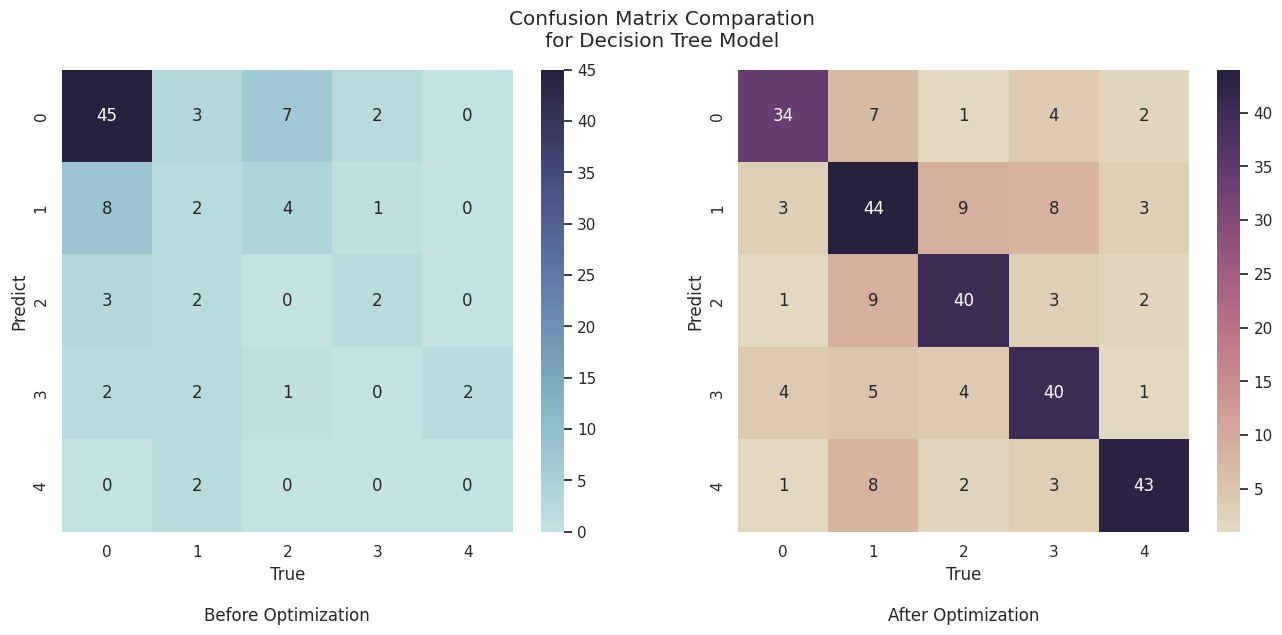

In [ ]:
cm = confusion_matrix(y_test, y_pred_dt)
cm_optimized = confusion_matrix(y_test_selected, y_pred_dt_optimized)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sns.heatmap(cm, annot=True, fmt="d", cmap=sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True), ax=ax[0])
sns.heatmap(cm_optimized, annot=True, fmt="d", cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True), ax=ax[1])

ax[0].set_ylabel('Predict')
ax[0].set_xlabel('True\n\nBefore Optimization')

ax[1].set_ylabel('Predict')
ax[1].set_xlabel('True\n\nAfter Optimization')

fig.suptitle("Confusion Matrix Comparation\nfor Decision Tree Model")

plt.show()

In [ ]:
y_pred_rf_optimized = optimized_classifier_rf.predict(X_test_selected)

# Evaluate the Optimized Random Forest model
print("\nOptimized Random Forest Model:")
accuracy_rf_optimized = round(accuracy_score(y_test_selected, y_pred_rf_optimized), 3)
print("Accuracy:", accuracy_rf_optimized)
print("Classification Report:")
print(classification_report(y_test_selected, y_pred_rf_optimized))


Optimized Random Forest Model:
Accuracy: 0.815
Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.77      0.80        48
         1.0       0.77      0.75      0.76        67
         2.0       0.76      0.80      0.78        55
         3.0       0.81      0.85      0.83        54
         4.0       0.93      0.91      0.92        57

    accuracy                           0.81       281
   macro avg       0.82      0.82      0.82       281
weighted avg       0.82      0.81      0.81       281



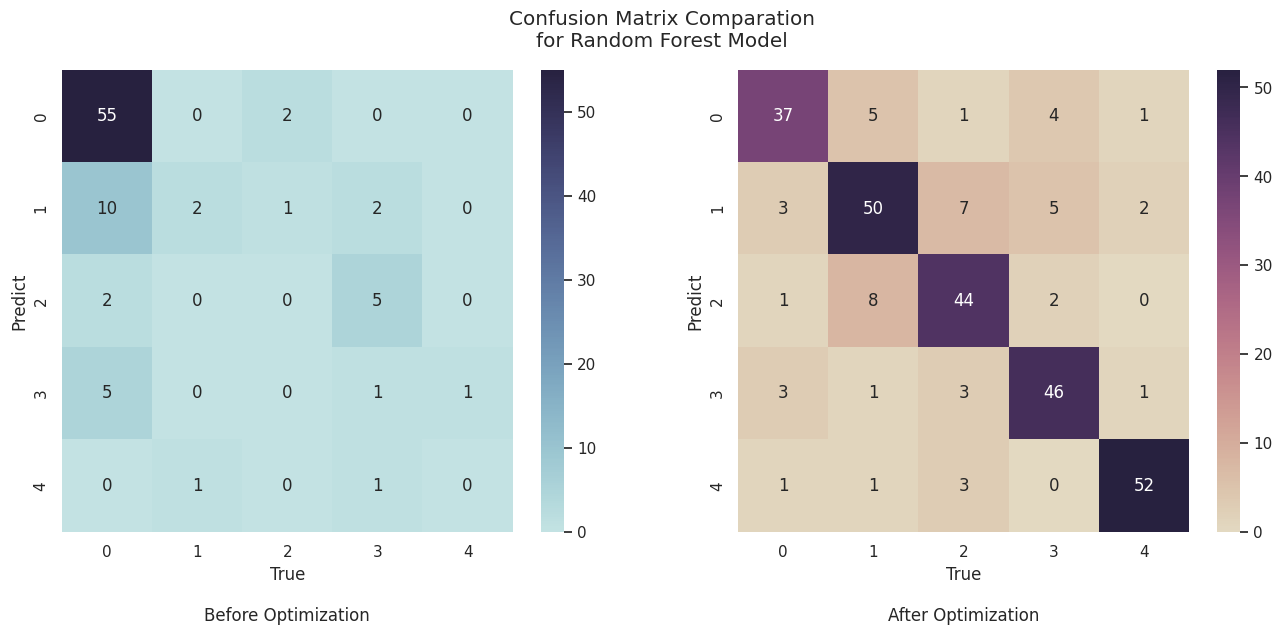

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)
cm_optimized = confusion_matrix(y_test_selected, y_pred_rf_optimized)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sns.heatmap(cm, annot=True, fmt="d", cmap=sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True), ax=ax[0])
sns.heatmap(cm_optimized, annot=True, fmt="d", cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True), ax=ax[1])

ax[0].set_ylabel('Predict')
ax[0].set_xlabel('True\n\nBefore Optimization')

ax[1].set_ylabel('Predict')
ax[1].set_xlabel('True\n\nAfter Optimization')

fig.suptitle("Confusion Matrix Comparation\nfor Random Forest Model")

plt.show()

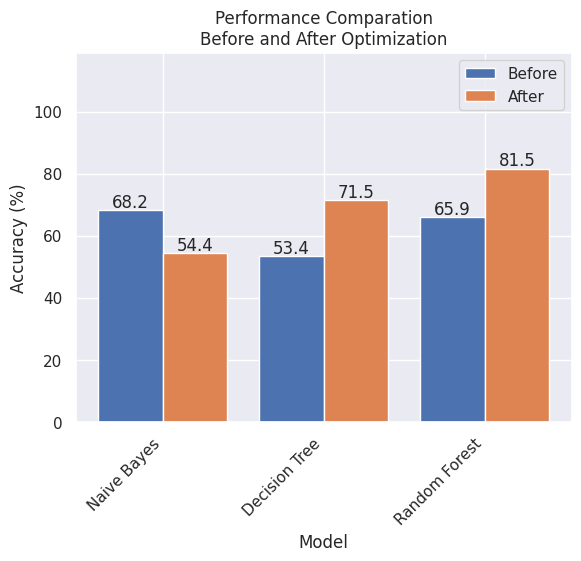

In [ ]:
model_name = ['Naive Bayes', 'Decision Tree', 'Random Forest']
before_optimization = [accuracy_nb*100, accuracy_dt*100, accuracy_rf*100]
after_optimization = [accuracy_nb_optimized*100, accuracy_dt_optimized*100, accuracy_rf_optimized*100]

X_axis = np.arange(len(model_name))

bars_1 = plt.bar(X_axis - 0.2, before_optimization, 0.4, label='Before')
bars_2 = plt.bar(X_axis + 0.2, after_optimization, 0.4, label='After')

for i, counts in enumerate(before_optimization):
  plt.text(i - 0.2, (counts + 1), str(round(counts, 1)), ha='center')

for i, counts in enumerate(after_optimization):
  plt.text(i + 0.2, (counts + 1), str(round(counts, 1)), ha='center')

plt.xticks(X_axis, model_name, rotation=45, ha='right')

plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Performance Comparation\nBefore and After Optimization')

plt.ylim(None, 119)
plt.legend()

plt.show()

Pada data Pasien Penyakit Jantung Hungarian, ditemukan banyak sekali nilai Null/data kosong, antara lain: 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'slope', 'ca', 'thal'. Selain itu juga ditemukan data duplikat.

Dilakukan pembersihan data untuk mengurangi nilai Null/data kosong, menghapus/drop data yang memiliki nilai Null lebih dari 100, dan menghapus data duplikat.


Setelah data dibersihkan, dilakukan permodelan menggunakan 3 model(Naive Bayes, Decision Tree, dan Random Forest). Selanjutnya mengevaluasi model dan didapatkan accuracy dari setiap model: GaussianNB=0.693; Decision Tree=0.580; dan Random Forest=0,682.


Selanjutnya dilakukan optimasi model klasifikasi, resampling data menggunakan SMOTE. Setelah itu ketiga model yang digunakan tadi dioptimasi dan dibandingkan accuracy-nya dengan yang sebelum optimasi